# Bharat Intern Project No 1-

# Stock Prediction :

# Take stock price of any company you
# want and predicts its price by using LSTM.
# Use only Jupyter notebook code.

In [1]:
# data collection
# !pip install pandas-datareader

In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo("AAPL", api_key = "d0e0bf8fe74f98018d45848f11141c07c588ea5b")

C:\Users\user\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-08-01 00:00:00+00:00  201.50  201.76  197.31  199.13  67935716   
       2018-08-02 00:00:00+00:00  207.39  208.38  200.35  200.58  62404012   
       2018-08-03 00:00:00+00:00  207.99  208.74  205.48  207.03  33447396   
       2018-08-06 00:00:00+00:00  209.07  209.25  207.07  208.00  25425387   
       2018-08-07 00:00:00+00:00  207.11  209.50  206.76  209.32  25587387   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-08-01 00:00:00+00:00  48.138087  48.200200  47.137101  47.571897   
       2018-08-02 00:00:00+00:00  49.545200  49.781710  47.863353  47.918300   
       2018-08-03 00:00:00+00:00  49.688539  49.867713  49.088903  49.459196   
       2018-08-06 00:00:00+00:00  49.946550  49.989551  49.468752  49.690928   
       2018-08-07 00:00:00+00:00  49.478308  50.049276  49.394694  50.006274   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-08-01 00:00:00+00:00  271742864      0.0          1.0  
       2018-08-02 00:00:00+00:00  249616048      0.0          1.0  
       2018-08-03 00:00:00+00:00  133789584      0.0          1.0  
       2018-08-06 00:00:00+00:00  101701548      0.0          1.0  
       2018-08-07 00:00:00+00:00  102349548      0.0          1.0

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("AAPL.csv")

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-01 00:00:00+00:00,201.50,201.76,197.31,199.13,67935716,48.138087,48.200200,47.137101,47.571897,271742864,0.0,1.0
1,AAPL,2018-08-02 00:00:00+00:00,207.39,208.38,200.35,200.58,62404012,49.545200,49.781710,47.863353,47.918300,249616048,0.0,1.0
2,AAPL,2018-08-03 00:00:00+00:00,207.99,208.74,205.48,207.03,33447396,49.688539,49.867713,49.088903,49.459196,133789584,0.0,1.0
3,AAPL,2018-08-06 00:00:00+00:00,209.07,209.25,207.07,208.00,25425387,49.946550,49.989551,49.468752,49.690928,101701548,0.0,1.0
4,AAPL,2018-08-07 00:00:00+00:00,207.11,209.50,206.76,209.32,25587387,49.478308,50.049276,49.394694,50.006274,102349548,0.0,1.0


In [9]:
df2 = df.reset_index()['close']

In [10]:
df2.shape

(1256,)

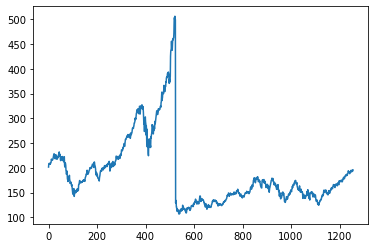

In [11]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [12]:
import numpy as np

In [13]:
# LSTM are very much sensetive to the scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [14]:
df2

array([[0.23709455],
       [0.25184721],
       [0.25335003],
       ...,
       [0.21956168],
       [0.21635567],
       [0.22289292]])

In [15]:
len(df2)*0.65

816.4

In [16]:
# splitting dataset into train and test 
training_size = int(len(df2)*0.65)
test_size = len(df2)-training_size
train_data, test_data = df2[0:training_size,:],df2[training_size:len(df2),:1]

In [17]:
print(training_size, test_size)

816 440


In [18]:
df2[0:training_size,:].shape

(816, 1)

In [19]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return np.array(dataX), np.array(dataY)    

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape, y_train.shape)

(715, 100) (715,)


In [22]:
 print(X_test.shape, y_test.shape)

(339, 100) (339,)


In [23]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')


In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100,batch_size = 64, verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 293ms/step - loss: 0.0254 - val_loss: 6.6875e-04
Epoch 2/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0105 - val_loss: 4.6083e-04
Epoch 3/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0107 - val_loss: 0.0014
Epoch 4/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0086 - val_loss: 4.5148e-04
Epoch 5/100
12/12 [==============================] - 3s 233ms/step - loss: 0.0081 - val_loss: 4.9776e-04
Epoch 6/100
12/12 [==============================] - 3s 230ms/step - loss: 0.0074 - val_loss: 2.9395e-04
Epoch 7/100
12/12 [==============================] - 3s 233ms/step - loss: 0.0070 - val_loss: 2.9659e-04
Epoch 8/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0070 - val_loss: 3.6198e-04
Epoch 9/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0058 - val_loss: 9.8629e-04
Epoch 10/100
12/12 [==============================] - 3s 22

12/12 [==============================] - 3s 222ms/step - loss: 0.0019 - val_loss: 1.9655e-04
Epoch 79/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0019 - val_loss: 2.1861e-04
Epoch 80/100
12/12 [==============================] - 3s 224ms/step - loss: 0.0021 - val_loss: 2.2452e-04
Epoch 81/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0016 - val_loss: 2.3681e-04
Epoch 82/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0015 - val_loss: 2.4065e-04
Epoch 83/100
12/12 [==============================] - 3s 228ms/step - loss: 0.0015 - val_loss: 1.9097e-04
Epoch 84/100
12/12 [==============================] - 3s 229ms/step - loss: 0.0015 - val_loss: 1.9343e-04
Epoch 85/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0015 - val_loss: 2.0034e-04
Epoch 86/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0014 - val_loss: 1.8123e-04
Epoch 87/100
12/12 [==============================] - 3s 22

In [28]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 39ms/step


In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

225.54548983008516

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

160.03626339414842

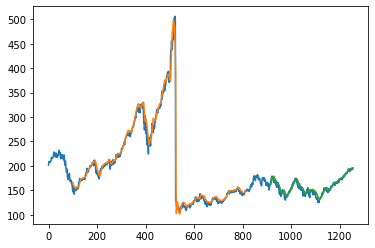

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

440

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.1675892298058

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):
    
    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.2243075]
100
1 day input [0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218
 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362
 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902
 0.20348153 0.20771446 0.20964308 

10 day input [0.12771446 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827
 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154
 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922
 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236
 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179
 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308
 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966
 0.21517846 0.21735755 0.21956168 0.21635567 0.222

20 day output [[0.26280713]]
21 day input [0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521
 0.21162179 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446
 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024
 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292
 0.22430751 0.22550705 0.22696277 0.22856146 0.23024014 0.23197135
 0.23374578 0.2355619